# IMPORT

In [670]:
# import pandas lib as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# GET DATA

In [671]:
# Get Meter List and daily data 
MeterList = pd.read_excel('../Data/19193111_MeterList.xls')
DailyForwardEnergy = pd.read_excel('../Data/19193111_Daily_Forward_Energy.xls')
DailyReverseEnergy = pd.read_excel('../Data/19193111_Daily_Reverse_Energy.xls')
DailyVoltage = pd.read_excel('../Data/19193111_Daily_Voltage.xls')
DailyCurrent = pd.read_excel('../Data/19193111_Daily_Current.xls')


print('- DailyForwardEnergy: print 02 top row ----------------')
print(DailyForwardEnergy.head(2))
print('- DailyReverseEnergy: print 02 top row ----------------')
print(DailyReverseEnergy.head(2))
print('- DailyVoltage: print 02 top row ----------------')
print(DailyVoltage.head(2))
print('- DailyCurrent: print 02 top row ----------------')
print(DailyCurrent.head(2))

- DailyForwardEnergy: print 02 top row ----------------
   Meter_No            Data_Time  Active_energy+_total  \
0  19205403  2022-09-18 00:00:00               9772.50   
1  19205403  2022-09-17 00:00:00               9758.77   

   Active_energy+_tariff1  Active_energy+_tariff2  Active_energy+_tariff3  \
0                     NaN                     NaN                     NaN   
1                     NaN                     NaN                     NaN   

   Active_energy+_tariff4  Reactive_energy+_total  Reactive_energy+_tariff1  \
0                     NaN                     NaN                       NaN   
1                     NaN                     NaN                       NaN   

   Reactive_energy+_tariff2  Reactive_energy+_tariff3  \
0                       NaN                       NaN   
1                       NaN                       NaN   

   Reactive_energy+_tariff4  
0                       NaN  
1                       NaN  
- DailyReverseEnergy: print 02 top ro

# CHECK METER LIST

In [672]:
# To check data. We must know how many active meter need to collect data
print('- MeterList: print 02 top row ----------------')
print(MeterList.head(2))
# Get Total Meter
TotalMeter = MeterList.shape[0]
print('\n- Total Meter: {total}'.format(total=TotalMeter))

# Get Meter have status is Active
ActiveMeterList = MeterList[(MeterList.Status == 'Running')]
TotalActiveMeter = ActiveMeterList.shape[0]
print('\n- Total Active Meter : {totalActive}'.format(totalActive=TotalActiveMeter))

# Get Meter Model : MM11-V1 is single phase meter, MM31/38 is Three phase meter
MeterModel = ActiveMeterList.Meter_Model.drop_duplicates()
print('\n- Meter Model:\n {first}'.format(first=MeterModel))
SinglePhaseMeter = ActiveMeterList[(ActiveMeterList.Meter_Model == 'MM11-V1')]
TotalSinglePhaseMeter = SinglePhaseMeter.shape[0]
ThreePhaseMeter = ActiveMeterList[(ActiveMeterList.Meter_Model == 'MM31/38')]
TotalThreePhaseMeter = ThreePhaseMeter.shape[0]

print('\n- Total Sing Meter : {first}; Total Three Phase Meter : {second}'.format(first=TotalSinglePhaseMeter,second=TotalThreePhaseMeter))


- MeterList: print 02 top row ----------------
   Meter_No   Status Meter_Model Customer_No         Customer_Name
0  19205924  Running     MM11-V1     T04.001  Nguyễn Văn Trình MĐK
1  19205923  Running     MM11-V1     T04.002     Nguyễn Văn Đệ MĐK

- Total Meter: 151

- Total Active Meter : 151

- Meter Model:
 0      MM11-V1
133    MM31/38
Name: Meter_Model, dtype: object

- Total Sing Meter : 143; Total Three Phase Meter : 8


# CHECK DAILY DATA
With daily data, we need to check the data collect from meter enough or not, check the data is normal or not

DEF function for Check Daily Data

In [673]:
def getDataRate(ActiveMeterList,DailyData,DataName):
    # Success Rate (how many meter have this data in day per total active meter)
    DailyData['Flag_Time_By_Day'] = DailyData.Data_Time.str.slice(0, 10)

    # Join Voltage data with meter List by Meter_No
    ActiveMeterListWithDailyData=ActiveMeterList.set_index('Meter_No').join(DailyData.set_index('Meter_No'))
    # print('\n- Print Top 02 row of Voltage data with meter List by Meter_No:\n {first}'.format(first=ActiveMeterListWithVoltageData.head(1)))

    # Get Group Data by Day
    DataByDay = DailyData.Flag_Time_By_Day.drop_duplicates()
    TotalDayCollectData = DataByDay.shape[0]
    print('\n- Total day collect {first} data:\n {second}'.format(first=DataName,second=TotalDayCollectData))
    
    # Get Success Data by Day
    Output= pd.DataFrame()
    Output['Day'] = DataByDay.copy()
    Success_Rate=[]
    for item in Output['Day']:
        TempData = ActiveMeterListWithDailyData[ActiveMeterListWithDailyData.Flag_Time_By_Day==item]
        Success_Rate.append(round(TempData.shape[0]*100/ActiveMeterList.shape[0],2))
        
    Output['Success_Rate'] = Success_Rate
    print('\n- Success rate of collect {first} data:\n {second}'.format(first=DataName,second=Output))
    
    # Show Chart of Success_Rate by Day
    # create data
    Output = Output.sort_values(by=['Day'])
    x=Output['Day']
    y=Output['Success_Rate'] 

    # Change the style of plot
    plt.figure(figsize=(18, 9))
    plt.xticks(rotation = 90)
    plt.style.use('seaborn-darkgrid')
    
    # Make the same graph
    plt.fill_between( x, y, color="skyblue", alpha=0.3)
    plt.plot(x, y, color="skyblue")
    
    # Add title and axis names
    plt.title('Success rate of collect {first} data'.format(first=DataName))
    plt.xlabel('Day')
    plt.ylabel('Success rate (%)')
    
    # Show graph
    plt.show()

    
    return ActiveMeterListWithDailyData, Output
    


## DAILY VOLTAGE DATA

Success Rate


- Total day collect Voltage data:
 141

- Success rate of collect Voltage data:
             Day  Success_Rate
0    2022-09-18         88.08
1    2022-09-17         88.08
2    2022-09-16         88.08
3    2022-09-15         88.08
4    2022-09-14         88.08
..          ...           ...
136  2022-05-05         88.08
137  2022-05-04         88.08
138  2022-05-03         88.08
139  2022-05-02         88.08
140  2022-05-01         88.08

[141 rows x 2 columns]


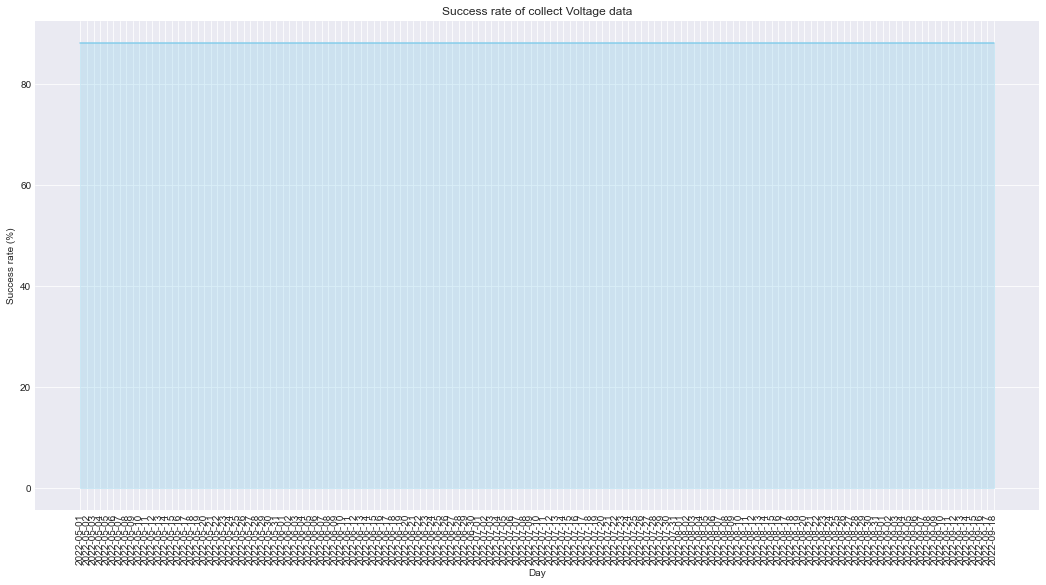

In [674]:
# Success Rate (how many meter have this data in day per total active meter)
ActiveMeterListWithVoltageData, SuccessRateVoltage = getDataRate(ActiveMeterList,DailyVoltage,'Voltage')


Check Unomal Data

In [675]:
# Voltage at Viet Nam normal from 176 V to 264 V. Check unormal data
max = 264
min = 176
UnormalVoltageData = ActiveMeterListWithVoltageData[((ActiveMeterListWithVoltageData.Voltage_in_phase_L1>max)|
                                                    (ActiveMeterListWithVoltageData.Voltage_in_phase_L1<min))|
                                                     ((ActiveMeterListWithVoltageData.Voltage_in_phase_L2>max)|
                                                    (ActiveMeterListWithVoltageData.Voltage_in_phase_L2<min))|
                                                     ((ActiveMeterListWithVoltageData.Voltage_in_phase_L3>max)|
                                                    (ActiveMeterListWithVoltageData.Voltage_in_phase_L3<min))]

TotalUnormalVoltageData = UnormalVoltageData.shape[0]
print('\n- Unormal Voltage Data :\n+ Total: {first} \n+ Detail:\n{second}'.format(first=TotalUnormalVoltageData,second=UnormalVoltageData))

# Three Phase meter normal must have voltage value of all Phase. Check unormal data. Just check with meter can collect data

VoltageDataThreePhaseMeter = ActiveMeterListWithVoltageData[ActiveMeterListWithVoltageData.Meter_Model=='MM31/38']
if VoltageDataThreePhaseMeter.shape[0]>0:
    VoltageDataThreePhaseMeter['CheckPhase1'] = VoltageDataThreePhaseMeter['Voltage_in_phase_L1'].isnull()
    VoltageDataThreePhaseMeter['CheckPhase2'] = VoltageDataThreePhaseMeter['Voltage_in_phase_L2'].isnull()
    VoltageDataThreePhaseMeter['CheckPhase3'] = VoltageDataThreePhaseMeter['Voltage_in_phase_L3'].isnull()

    UnormalVoltageDataThreePhaseMeter = VoltageDataThreePhaseMeter[((VoltageDataThreePhaseMeter.CheckPhase1==True)|
                                                                        (VoltageDataThreePhaseMeter.CheckPhase2==True)|
                                                                        (VoltageDataThreePhaseMeter.CheckPhase3==True))&
                                                                        ((VoltageDataThreePhaseMeter.CheckPhase1==False)|
                                                                        (VoltageDataThreePhaseMeter.CheckPhase2==False)|
                                                                        (VoltageDataThreePhaseMeter.CheckPhase3==False))]

    TotalUnormalVoltageDataThreePhaseMeter = UnormalVoltageDataThreePhaseMeter.shape[0]
    print('\n- Unormal Voltage Data Three Phase Meter :\n+ Total: {first} \n+ Detail:\n{second}'.format(first=TotalUnormalVoltageDataThreePhaseMeter,second=UnormalVoltageDataThreePhaseMeter))
else:
    print('\n- Do not have Current Data of Three Phase Meter')  


- Unormal Voltage Data :
+ Total: 3 
+ Detail:
           Status Meter_Model Customer_No           Customer_Name  \
Meter_No                                                            
19205403  Running     MM11-V1     T04.144           Đỗ Quốc Triệu   
19205409  Running     MM11-V1     T04.134              Đỗ Sào Nam   
19362985  Running     MM31/38     T04.014  Quách Thị Hằng 2 3FMĐK   

          Voltage_in_phase_L1  Voltage_in_phase_L2  Voltage_in_phase_L3  \
Meter_No                                                                  
19205403                170.0                  NaN                  NaN   
19205409                272.0                  NaN                  NaN   
19362985                170.0                170.0                170.0   

                    Data_Time Flag_Time_By_Day  
Meter_No                                        
19205403  2022-09-07 00:00:00       2022-09-07  
19205409  2022-08-19 00:00:00       2022-08-19  
19362985  2022-09-07 00:00:00     

C:\Users\PhamB\AppData\Local\Temp\ipykernel_21472\2751725692.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VoltageDataThreePhaseMeter['CheckPhase1'] = VoltageDataThreePhaseMeter['Voltage_in_phase_L1'].isnull()
C:\Users\PhamB\AppData\Local\Temp\ipykernel_21472\2751725692.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  VoltageDataThreePhaseMeter['CheckPhase2'] = VoltageDataThreePhaseMeter['Voltage_in_phase_L2'].isnull()
C:\Users\PhamB\AppData\Local\Temp\ipykernel_21472\2751725692.py:20: SettingWit

## DAILY CURRENT DATA

Success Rate


- Total day collect Current data:
 141

- Success rate of collect Current data:
             Day  Success_Rate
0    2022-09-18         87.42
1    2022-09-17         87.42
2    2022-09-16         87.42
3    2022-09-15         87.42
4    2022-09-14         87.42
..          ...           ...
136  2022-05-05         87.42
137  2022-05-04         87.42
138  2022-05-03         87.42
139  2022-05-02         87.42
140  2022-05-01         87.42

[141 rows x 2 columns]


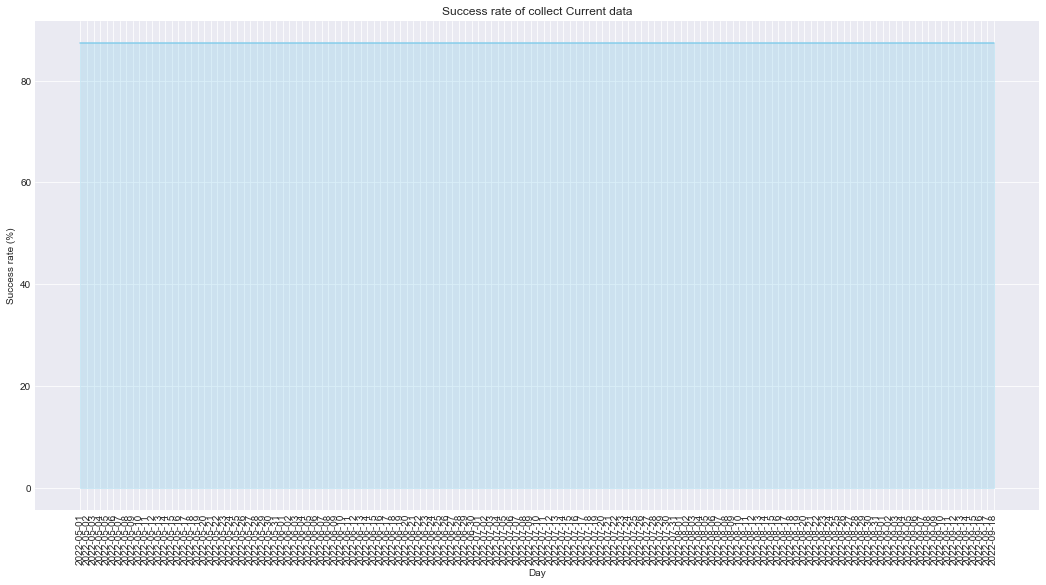

In [676]:
# Success Rate (how many meter have this data in day per total active meter)
ActiveMeterListWithCurrentData, SuccessRateCurrent = getDataRate(ActiveMeterList,DailyCurrent,'Current')

Check Unomal Data

In [677]:
# Current range of single phase meter is 0 - 80A (Imax = 80A), Three phase meter is 0 - 100A (Imax = 100A). Meter can run normal if Current value < 120% Imax. Check Meter have unomal Current
ImaxSinglePhaseMeter = 80
ImaxThreePhaseMeter = 100

# Check Current range of single phase meter
CurrentDataSinglePhaseMeter = ActiveMeterListWithCurrentData[ActiveMeterListWithCurrentData.Meter_Model=='MM11-V1']

if CurrentDataSinglePhaseMeter.shape[0]>0:
    UnormalCurrentDataSinglePhaseMeter = CurrentDataSinglePhaseMeter[CurrentDataSinglePhaseMeter.Current_in_phase_L1>ImaxSinglePhaseMeter]

    TotalUnormalCurrentDataSinglePhaseMeter = UnormalCurrentDataSinglePhaseMeter.shape[0]
    print('\n- Unormal Current Data Single Phase Meter :\n+ Total: {first} \n+ Detail:\n{second}'.format(first=TotalUnormalCurrentDataSinglePhaseMeter,second=UnormalCurrentDataSinglePhaseMeter))
else:
    print('\n- Do not have Current Data of Single Phase Meter')    
# Check Current range of single phase meter

CurrentDataThreePhaseMeter = ActiveMeterListWithCurrentData[ActiveMeterListWithCurrentData.Meter_Model=='MM31/38']
if CurrentDataThreePhaseMeter.shape[0]>0:
    UnormalCurrentDataThreePhaseMeter = CurrentDataThreePhaseMeter[(CurrentDataThreePhaseMeter.Current_in_phase_L1>ImaxThreePhaseMeter)|
                                                                (CurrentDataThreePhaseMeter.Current_in_phase_L2>ImaxThreePhaseMeter)|
                                                                (CurrentDataThreePhaseMeter.Current_in_phase_L3>ImaxThreePhaseMeter)]

    TotalUnormalCurrentDataThreePhaseMeter = UnormalCurrentDataThreePhaseMeter.shape[0]
    print('\n- Unormal Current Data Three Phase Meter :\n+ Total: {first} \n+ Detail:\n{second}'.format(first=TotalUnormalCurrentDataThreePhaseMeter,second=UnormalCurrentDataThreePhaseMeter))
else:
    print('\n- Do not have Current Data of Three Phase Meter')    


- Unormal Current Data Single Phase Meter :
+ Total: 0 
+ Detail:
Empty DataFrame
Columns: [Status, Meter_Model, Customer_No, Customer_Name, Data_Time, Current_in_phase_L1, Current_in_phase_L2, Current_in_phase_L3, Flag_Time_By_Day]
Index: []

- Unormal Current Data Three Phase Meter :
+ Total: 0 
+ Detail:
Empty DataFrame
Columns: [Status, Meter_Model, Customer_No, Customer_Name, Data_Time, Current_in_phase_L1, Current_in_phase_L2, Current_in_phase_L3, Flag_Time_By_Day]
Index: []


## DAILY FORWARD ENERGY DATA

Success Rate


- Total day collect Forward Energy data:
 141

- Success rate of collect Forward Energy data:
             Day  Success_Rate
0    2022-09-18         87.42
1    2022-09-17         87.42
2    2022-09-16         87.42
3    2022-09-15         87.42
4    2022-09-14         87.42
..          ...           ...
136  2022-05-05         87.42
137  2022-05-04         87.42
138  2022-05-03         87.42
139  2022-05-02         87.42
140  2022-05-01         87.42

[141 rows x 2 columns]


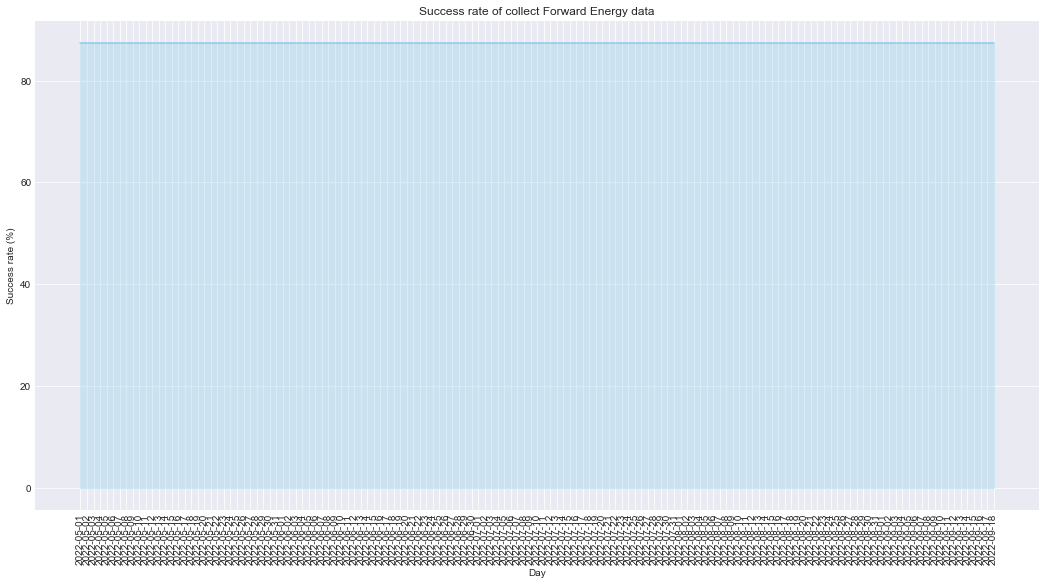

In [678]:
# Success Rate (how many meter have this data in day per total active meter)
ActiveMeterListWithForwardEnergyData, SuccessRateForwardEnergyData = getDataRate(ActiveMeterList,DailyCurrent,'Forward Energy')

Check Unomal Data

## DAILY FORWARD ENERGY DATA

Success Rate


- Total day collect Reverse Energy data:
 141

- Success rate of collect Reverse Energy data:
             Day  Success_Rate
0    2022-09-18         87.42
1    2022-09-17         87.42
2    2022-09-16         87.42
3    2022-09-15         87.42
4    2022-09-14         87.42
..          ...           ...
136  2022-05-05         87.42
137  2022-05-04         87.42
138  2022-05-03         87.42
139  2022-05-02         87.42
140  2022-05-01         87.42

[141 rows x 2 columns]


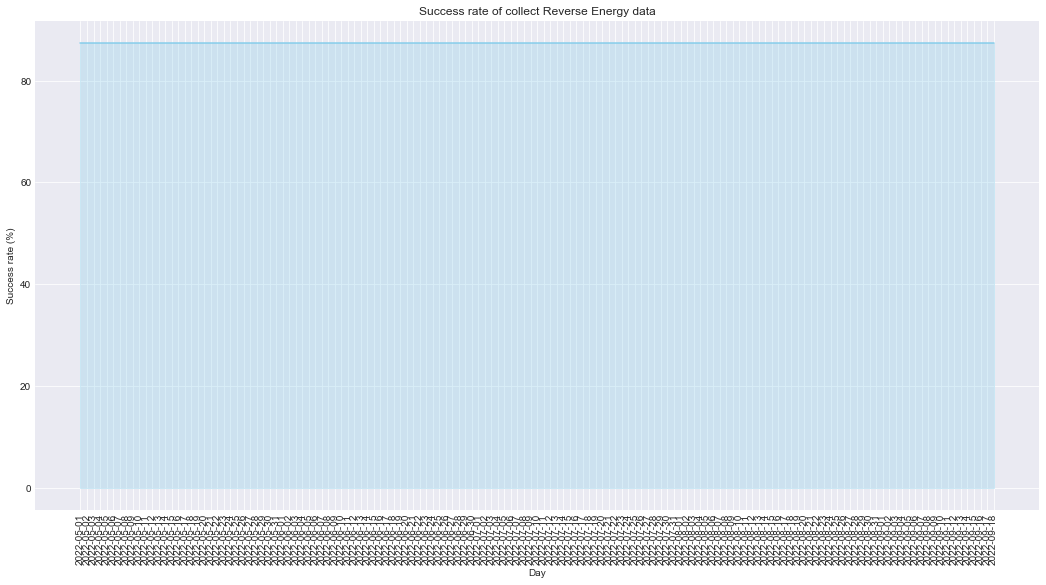

In [679]:
# Success Rate (how many meter have this data in day per total active meter)
ActiveMeterListWithReverseEnergyData, SuccessRateReverseEnergyData = getDataRate(ActiveMeterList,DailyCurrent,'Reverse Energy')

Check Unomal Data